# Load Dataset

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import plotly.express as px
colors = ['#d62728', '#1f77b4']


import warnings 
warnings.filterwarnings('ignore')

In [ ]:
def read_dataset(path):
    df = pd.read_csv(path)
    display(df.info())
    display(df.head())
    print(" (row, col) = ", df.shape)
    display(df.describe())
    return df

In [ ]:
PATH = "https://raw.githubusercontent.com/vsonwork/Machine_Learning/main/TravelInsurancePrediction.csv" # dataset is added on my github 

df = read_dataset(PATH)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


None

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


 (row, col) =  (1987, 10)


,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


# Data Analysis

In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"])

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
unique count,11,2,2,30,8,2,2,2,2


0    1277
1     710
Name: TravelInsurance, dtype: int64


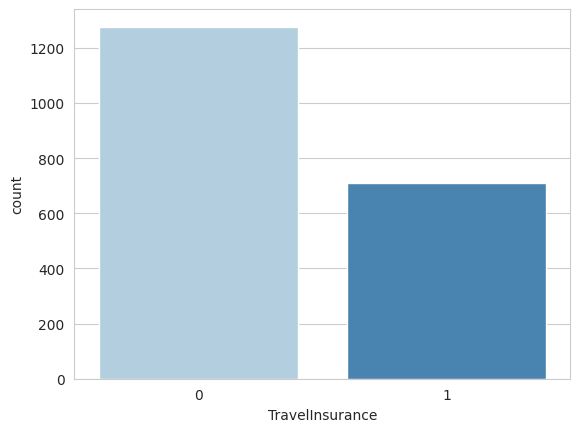

In [ ]:
# Distribution of the target variable
sns.countplot(data=df, x='TravelInsurance', palette = "Blues")
print(df['TravelInsurance'].value_counts())

> __<u>Finding:</u>__ According to this data, many people do **not purchase** travel insurance.

In [ ]:
px.pie(values = df['TravelInsurance'].value_counts(), names = ['Not Purchased', 'Purchased'], color_discrete_sequence = colors, 
             title='How many participants purchased travel insurance?')

> __<u>Finding:</u>__ 35.7% of participants purchased travel insurance; 64.3% did not purchase travel insurance.

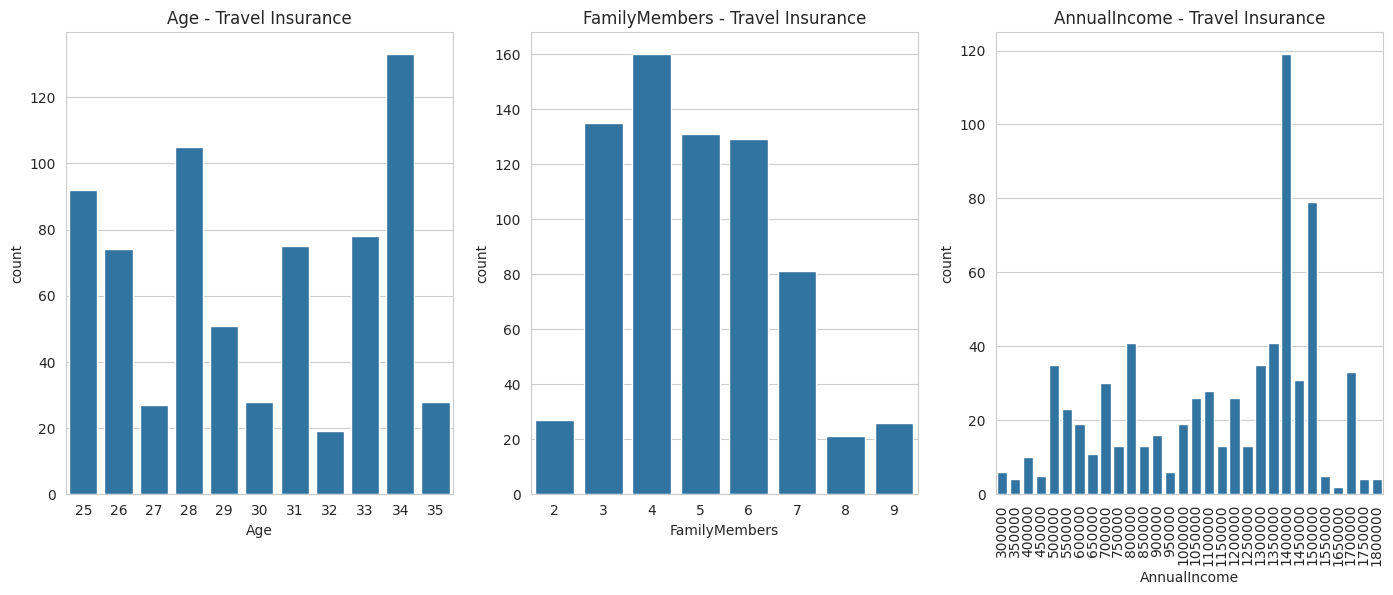

In [ ]:
# Define variables to plot
variables = ['Age', 'FamilyMembers', 'AnnualIncome']

plt.figure(figsize = (17, 6))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.countplot(df[df['TravelInsurance']==1], x=var, color=colors[1])
    plt.title(f'{var} - Travel Insurance')
    
plt.xticks(rotation=90)
plt.show()

> __<u>Finding:</u>__


*   __Age:__ The largest buy is made at 34 years old, and the lowest purchase is made at 27, 30, and 32 years old.
*   __Family Members:__ The family with 4 members is the most purchased.
*   __Annual Income:__ Earn 1400 thousand Rupees on the highest purchase.







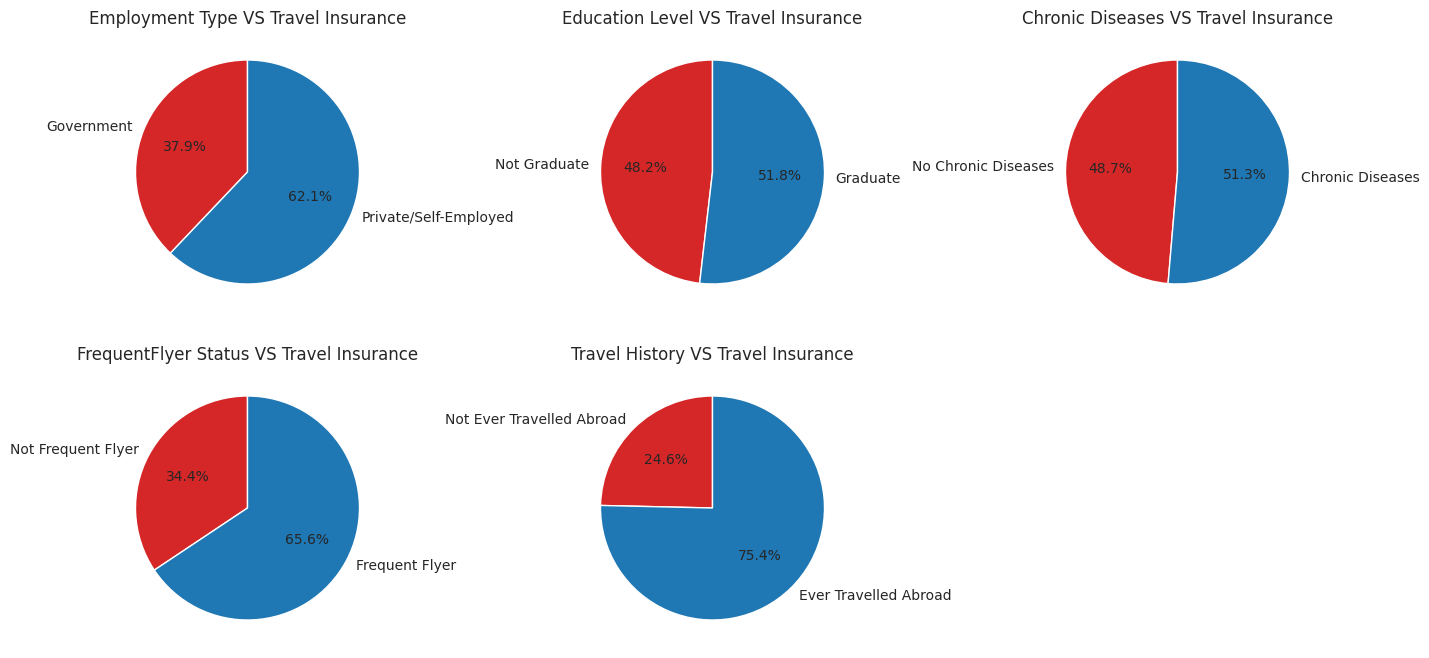

In [ ]:
# define helper function to calculate percentage of customers who purchased travel insurance
def calc_purchase_pct(df, group_col):
    return (df.groupby(group_col).sum()['TravelInsurance'] / df.groupby(group_col).count()['TravelInsurance']) * 100

# define data to plot 
data_to_plot = [
    {'col': 'Employment Type', 'title': 'Employment Type VS Travel Insurance', 'labels': ['Government', 'Private/Self-Employed']},
    {'col': 'GraduateOrNot', 'title': 'Education Level VS Travel Insurance', 'labels': ['Not Graduate', 'Graduate']},
    {'col': 'ChronicDiseases', 'title': 'Chronic Diseases VS Travel Insurance', 'labels': ['No Chronic Diseases', 'Chronic Diseases']},
    {'col': 'FrequentFlyer', 'title': 'FrequentFlyer Status VS Travel Insurance', 'labels': ['Not Frequent Flyer', 'Frequent Flyer']},
    {'col': 'EverTravelledAbroad', 'title': 'Travel History VS Travel Insurance', 'labels': ['Not Ever Travelled Abroad', 'Ever Travelled Abroad']}
]

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (17, 8))
for i, d in enumerate(data_to_plot):
    purchase_pct = calc_purchase_pct(df, d['col'])
    row_idx = i // 3
    col_idx = i % 3
    axs[row_idx][col_idx].pie(purchase_pct.values, labels = d['labels'], autopct = '%1.1f%%', startangle = 90, colors = colors)
    axs[row_idx][col_idx].set_title(d['title'])

fig.delaxes(axs[1][2])
plt.show()


> __<u>Finding:</u>__


*   __Employment Type:__ The proportion of persons purchasing travel insurance in the private sector is 62.1%, while it is 37.9% in the government sector.
*   __Education Level:__ Graduates spend about 51.8% of their income on travel insurance, compared to non-graduates who spend about 48.2%.
*   __Chronic Diseases:__ 48.7% of individuals without Chronic Diseases acquire travel insurance, whereas 51.3% of those with Chronic Diseases do so.
*   __Frequent Flyer status:__ While 65.6% of frequent flyers purchase travel insurance, only 34.4% of non-frequent flyers do.
*   __Travel History:__ Only 24.6% of people who have never traveled abroad buy travel insurance, compared to 75.4% of people in the other group.



# Preprocessing

In [ ]:
def preprocessing_data(df):
    df = df
    return df

In [ ]:
df = preprocessing_data(df.copy())

In [ ]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


# Future Engineering

In [ ]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
    for i in categorical_cols:
        df[i] = df[i].astype("category").cat.codes

    display(df.head())
    display(df.corr())
    return df

df = apply_feature_engineering(df)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,-0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,-0.115134,1.000000,-0.127133,0.349157,-0.003354,-0.011553,0.143790,0.181098,0.147847
GraduateOrNot,0.027125,-0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,-0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,-0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,0.147847,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


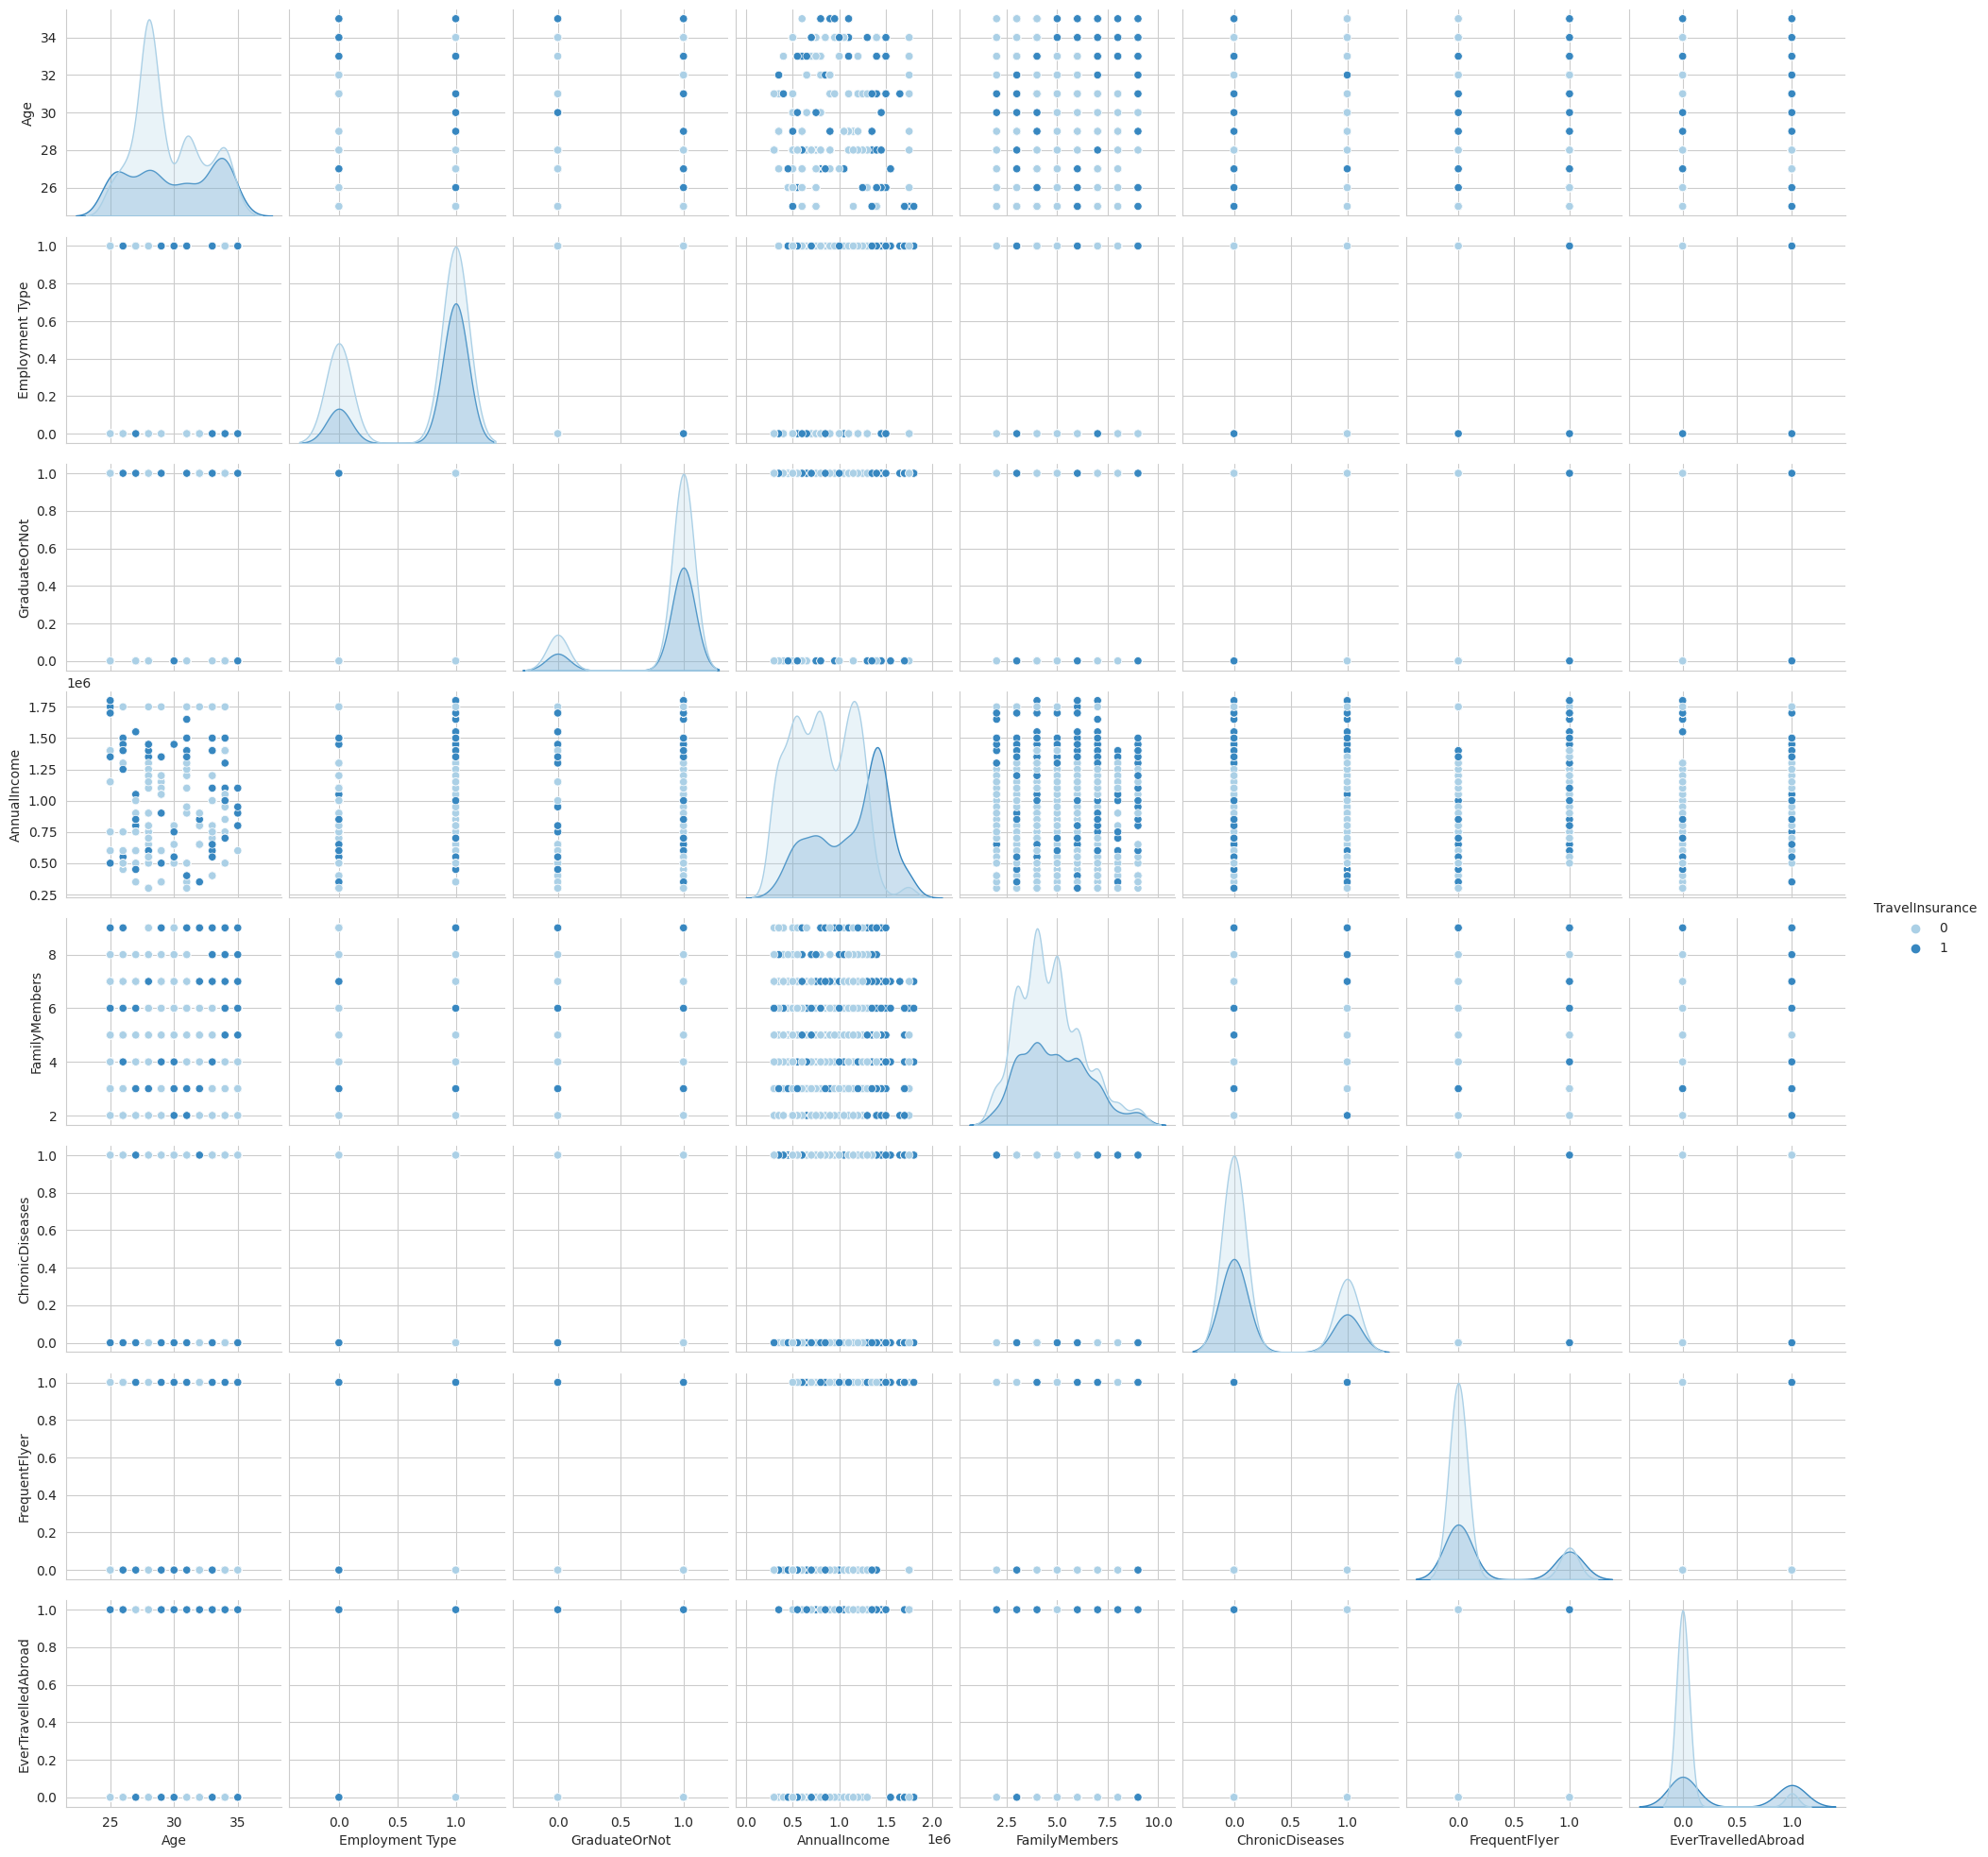

In [ ]:
sns.pairplot(df, hue="TravelInsurance", palette="Blues")

<Axes: >

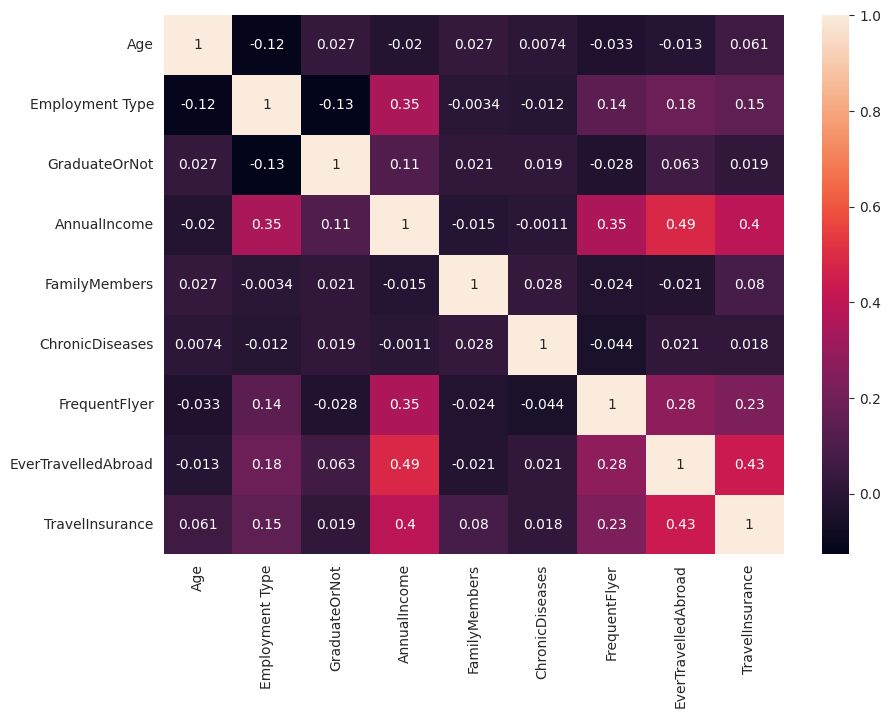

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True) # Show heatmap after normalized data

## Check outlier

In [ ]:
z_scores = (df.select_dtypes('number') - df.select_dtypes('number').mean()) / df.select_dtypes('number').std()
potential_outliers = df[(z_scores > 3).any(axis=1)]
print(potential_outliers)

Empty DataFrame
Columns: [Age, Employment Type, GraduateOrNot, AnnualIncome, FamilyMembers, ChronicDiseases, FrequentFlyer, EverTravelledAbroad, TravelInsurance]
Index: []


# Apply machine learning model

## Train-Test split

In [ ]:
def prepare_X_y(df):
    X = df.drop("TravelInsurance", axis = 1)
    y = df["TravelInsurance"]
    return X, y

X, y = prepare_X_y(df)

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 8
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Haling imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
#using smote to handle class imbalance for minority class
over = SMOTE()

#fitting smote on training set and testing on real unsampled data
balX, balY = over.fit_resample(trainX, trainY)

In [ ]:
balY.value_counts()

0    1014
1    1014
Name: TravelInsurance, dtype: int64

## Buil SK-learn model

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaler = MinMaxScaler()
pca = PCA()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, auc, classification_report

def calculate_performance(y_true, y_pred, pred_nb):
    print()
    print("Precision: ", precision_score(y_true , y_pred))
    print("Recall: ", recall_score(y_true , y_pred))
    print("F1: ", f1_score(y_true , y_pred))
    
    print("-" * 100)
    print("Classification report: \n", classification_report(y_true , y_pred))

    plt.figure(figsize = (18,4.5))
    plt.subplot(1,3,1)
    sns.heatmap(confusion_matrix(y_true , y_pred), annot=True, cmap='Blues', fmt= '.0f')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

    plt.subplot(1,3,2)
    precision, recall, thresholds  = precision_recall_curve(y_true, pred_nb)
    # plot the precision-recall curve
    plt.plot(recall, precision, '-o')
    plt.fill_between(recall, precision, alpha=0.2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    fpr, tpr, _ = roc_curve(y_true, pred_nb)
    roc_auc = auc(fpr, tpr)

    # plotting the curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],"k--",'r+')
    plt.plot(fpr, tpr,label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Naive Bayes ROC Curve")
    plt.legend(loc='lower right')

    plt.show()


Best parameter (CV score=0.670):
{'gau_nb__var_smoothing': 0.1, 'pca__n_components': 5, 'scaler__feature_range': (-1, 1)}

Precision:  0.7009345794392523
Recall:  0.5555555555555556
F1:  0.6198347107438016
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       263
           1       0.70      0.56      0.62       135

    accuracy                           0.77       398
   macro avg       0.75      0.72      0.73       398
weighted avg       0.76      0.77      0.76       398



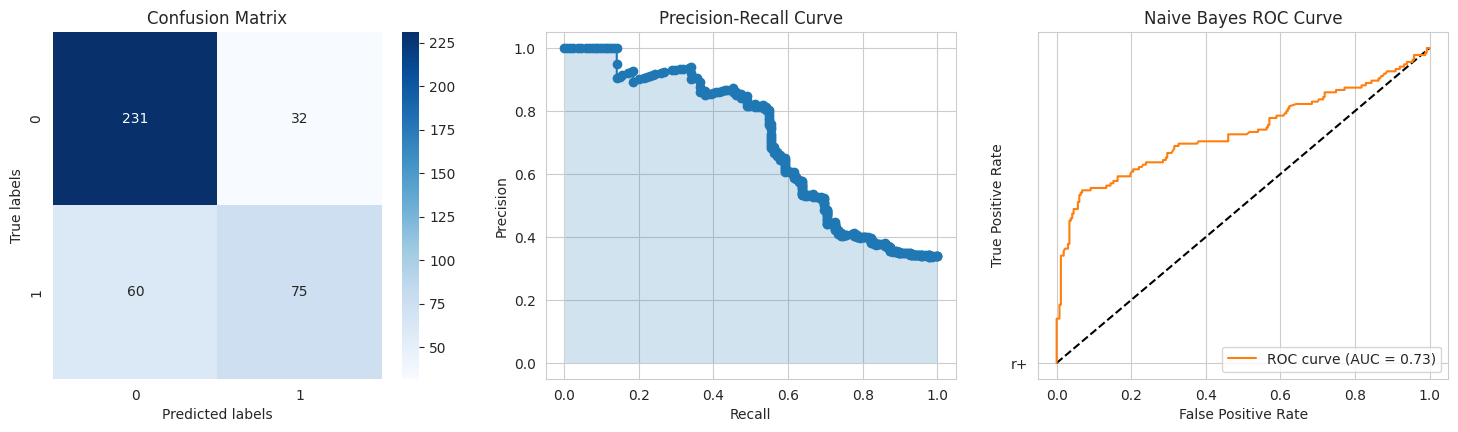

In [ ]:
from sklearn.naive_bayes import GaussianNB

gau_nb = GaussianNB()
pipe = Pipeline(steps=[("scaler", scaler),("pca", pca), ("gau_nb", gau_nb)]) #Build a pipeline with a scaler and a model
# Parameters of pipelines can be set using '__' separated parameter names:
var_smoothing_values = np.logspace(-1, -9, num=100)
param_grid = {
    "scaler__feature_range": [(-1, 1), (0, 1)],
    "pca__n_components": [5, 15, 30, 35],
    'gau_nb__var_smoothing': var_smoothing_values
    }

search = GridSearchCV(pipe, param_grid, cv = 5, n_jobs=2)
search.fit(balX, balY)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


predicted_label = search.predict(testX)
pred_nb = search.predict_proba(testX)[:, 1]
calculate_performance(testY, predicted_label, pred_nb)

# Conclusion
- Other metrics, such as precision, recall, or ROC curve, may be more appropriate depending on the specific problem context because the cost of false positives (predicting a person will buy a travel insurance policy when they will not) and false negatives (predicting a person will not buy a travel insurance policy when they will) differ. However, since false positives are more expensive than false negatives, `precision` __(70.09%)__ should be viewed as the primary metric. Additionally, the trade-off between true positive rate and false positive rate at different decision thresholds can be assessed using the ROC curve.
- Naive Bayes model: use MinMaxScaler, PCA and best_params: {'gau_nb__var_smoothing': 0.1, 'pca__n_components': 5, 'scaler__feature_range': (-1, 1)} 
